# HR Analytics

## Discovering the factors that influence employee turnover

## Exploratory Data Analysis
***

# Table of Contents
### Defining the problem and objectives
- [The Problem](#The-Problem)
- [Goals for EDA](#eda-goals)

### [EDA - General](#EDA)

- [Data Types](#dtypes)
- [Data Summary](#summarize-data)
- [Checking for missing values, duplicates and if balanced data](#miss-val)

### [EDA 1 - Gender Differences](#EDA1)

- [Job Satisfaction](#g-job-satisfaction)
- [Environment Satisfaction](#g-environment-satisfaction)
- [Relationship Satisfaction](#g-relationship-satisfaction)
- [Percent Salary Hike](#g-salary-hike)
- [Marital Status](#g-marital-status)
- [Work Life Balance](#g-work-life-balance)
- [Years At Company](#g-years-at-company)
- [Years Since Last Promotion](#g-years-promotion)
- [Job Level](#g-job-level)
- [Age](#g-age)
- [Hourly Rate](#g-hourly-rate)
- [Overtime](#g-overtime)

### [EDA 2 - Education Field Differences](#EDA2)

- [Training Times Last Year](#e-trainingtimes)
- [Years At Company](#e-years-at-company)
- [Years In Current Role](#e-years-current-role)
- [Years Since Last Promotion](#e-years-last-promotion)
- [Years With Current Manager](#e-years-current-manager)
- [Stock Option Level](#e-stock-option-level)

### [EDA 3 - Salary Differences](#EDA3)

- [Age](#s-age)
- [Job Level](#s-job-level)
- [Job Satisfaction](#s-job-satisfaction)
- [Education](#s-education)
- [OverTime](#s-overtime)
- [NumCompaniesWorked](#s-companies-worked)

### [EDA 4 -  Job Level Differences](#EDA4)

- [Job Role](#j-job-role)
- [Job Satisfaction](#j-job-satisfaction)
- [Job Satisfaction Entry Level](#j-job-satisfaction-entry-level)
- [Work Life Balance](#j-work-life-balance)
- [Environment Satisfaction](#j-environment-satisfaction)
- [Years At The Company](#j-years-at-company)

- [Work Life Balance and Overtime](#worklifebalance-overtime)
- [Correlation plots](#correlation-plots)


### [Summary](#summary)

### [Limitations and Discussion](#limitations-and-discussion)

<a id='The-problem'></a>
# The Problem

This project aims to examine the possible causes of employee attrition based on available data. 
Attrition of employees can lead to increase of costs, lack of knowledgeable employees, increase in resources for training and hiring new employees. 
Identifying possible causes of attrition can help pinpoint the employees who are more likely to resign.

<a id='eda-goals'></a>
## Goals for EDA

In this analysis we would like to determine if there are relationships between different levels of variables and attrition. 

First, we will look at gender differences and see if some factors are more indicative of increased risk of female / male employees quitting their job. 

Next, we will explore education field differences and salary differences and at the end job level differences. 

At the end, we will also look at correlation plots for numerical variables.

Dataset - https://www.kaggle.com/pavansubhasht/ibm-hr-analytics-attrition-dataset

In [107]:
__author__ = "Vita Levytska"
__email__ = "levytska.vita@gmail.com"

## Load Packages

In [108]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as matplot
import seaborn as sns

## Functions

In [174]:
def read_data(file):
    return pd.read_csv(file)

def drop_columns(df, col_list):
    data = df.drop(col_list, axis=1)
    return data

## Read and Display Data

In [109]:
df = read_data("WA_Fn-UseC_-HR-Employee-Attrition.csv")
pd.set_option('display.max_columns', None)
df.head(7)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2
5,32,No,Travel_Frequently,1005,Research & Development,2,2,Life Sciences,1,8,4,Male,79,3,1,Laboratory Technician,4,Single,3068,11864,0,Y,No,13,3,3,80,0,8,2,2,7,7,3,6
6,59,No,Travel_Rarely,1324,Research & Development,3,3,Medical,1,10,3,Female,81,4,1,Laboratory Technician,1,Married,2670,9964,4,Y,Yes,20,4,1,80,3,12,3,2,1,0,0,0


## Functions for visualizations

In [110]:
def boxen_plot(cat_var_x,cat_var_y,hue, palette="BuPu"):
    ax = sns.boxenplot(x=cat_var_x, y=cat_var_y, hue=hue,
                 data=df, palette=palette)
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
    
def violin_plot(cat_var_x,cat_var_y,hue, palette="BuPu"):
    ax = sns.violinplot(x=cat_var_x, y=cat_var_y, hue=hue,
                 data=df, palette=palette)
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)

def get_counts(group_vars):
    df['Count_' + group_vars[0] + '_by_' + group_vars[1] + group_vars[2]] = df.groupby(group_vars)[group_vars[0]].transform('count')
    return df['Count_' + group_vars[0] + '_by_' + group_vars[1] + group_vars[2]]

def create_plots(x_var, y_var, hue, plot_type, palette = 'Set2'):
    fig, ax = plt.subplots(1,2, figsize = (15,6))
    if hue == 'Gender':
        hue_order = ["Male", "Female"]
    elif hue == 'EducationField':
        hue_order = ['Life Sciences','Medical', 'Technical Degree', 'Marketing', 'Human Resources', 'Other']
    elif hue == 'JobRole':
        hue_order = ['Sales Executive','Laboratory Technician', 'Sales Representative', 'Research Scientist', 
                     'Research Director', 'Human Resources', 'Healthcare Representative', 'Manufacturing Director',
                    'Manager']
    else:
        hue_order = None
    if plot_type == 'line':
        sns.lineplot(x = x_var, y = y_var, hue = hue, palette = 'Set2', data = df[df['Attrition'] == 'Yes'],hue_order = hue_order, ax = ax[0])
        sns.lineplot(x = x_var, y = y_var, hue = hue, palette = 'Set2', data = df[df['Attrition'] == 'No'], hue_order = hue_order, ax = ax[1])
    elif plot_type == 'point':
        sns.pointplot(x = x_var, y = y_var, hue = hue, palette = 'Set2', data = df[df['Attrition'] == 'Yes'],hue_order = hue_order, ax = ax[0])
        sns.pointplot(x = x_var, y = y_var, hue = hue, palette = 'Set2', data = df[df['Attrition'] == 'No'], hue_order = hue_order, ax = ax[1])
    elif plot_type == 'scatter':
        sns.scatterplot(x = x_var, y = y_var, hue = hue, data = df[df['Attrition'] == 'Yes'], hue_order = hue_order, ax = ax[0])
        sns.scatterplot(x = x_var, y = y_var, hue = hue, data = df[df['Attrition'] == 'No'], hue_order = hue_order, ax = ax[1])
    if plot_type == 'line' or plot_type == 'point':
        ax[0].set(xlabel = x_var, ylabel='Count')
        ax[1].set(xlabel = x_var, ylabel='Count')
    elif plot_type == 'scatter':
        ax[0].set(xlabel = x_var, ylabel= y_var)
        ax[1].set(xlabel = x_var, ylabel= y_var)
    ax[0].set_title("Attrition = Yes")
    ax[1].set_title("Attrition = No")
    
    
def plot_cat_vars(cat_var, cat_var_hue, df = df, rotation = 'no'):
    g = sns.catplot(x=cat_var, col="Attrition", hue=cat_var_hue,
                data=df, kind="count",
                height=6, aspect=.9, palette = 'Set2')
    if rotation == 'yes':
        for axes in g.axes.flat:
            _ = axes.set_xticklabels(axes.get_xticklabels(), rotation=90)

In [111]:
#set categorical order
df['MaritalStatus'] = pd.Categorical(df['MaritalStatus'],
                                   categories=['Single', 'Married', 'Divorced'],
                                   ordered=True)
df['OverTime'] = pd.Categorical(df['OverTime'],
                                   categories=['Yes', 'No'],
                                   ordered=True)
df['JobRole'] = pd.Categorical(df['JobRole'],
                                   categories=['Sales Executive','Laboratory Technician', 'Sales Representative', 'Research Scientist', 
                     'Research Director', 'Human Resources', 'Healthcare Representative', 'Manufacturing Director',
                    'Manager'],
                                   ordered=True)
df['Attrition'] = pd.Categorical(df['Attrition'],
                                   categories=['Yes', 'No'],
                                   ordered=True)

<a id='EDA'></a>
# EDA - Data Check

<a id='dtypes'></a>
## See dtypes using .info()

In [112]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   Age                       1470 non-null   int64   
 1   Attrition                 1470 non-null   category
 2   BusinessTravel            1470 non-null   object  
 3   DailyRate                 1470 non-null   int64   
 4   Department                1470 non-null   object  
 5   DistanceFromHome          1470 non-null   int64   
 6   Education                 1470 non-null   int64   
 7   EducationField            1470 non-null   object  
 8   EmployeeCount             1470 non-null   int64   
 9   EmployeeNumber            1470 non-null   int64   
 10  EnvironmentSatisfaction   1470 non-null   int64   
 11  Gender                    1470 non-null   object  
 12  HourlyRate                1470 non-null   int64   
 13  JobInvolvement            1470 non-null   int64 

In [113]:
df.shape

(1470, 35)

<a id='summarize-data'></a>
## Summarize the data

In [114]:
df.describe() #numerical columns

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,2.728571,6502.931293,14313.103401,2.693197,15.209524,3.153741,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,1.102846,4707.956783,7117.786044,2.498009,3.659938,0.360824,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,1009.000000,2094.000000,0.000000,11.000000,3.000000,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,2.000000,2911.000000,8047.000000,1.000000,12.000000,3.000000,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,3.000000,4919.000000,14235.500000,2.000000,14.000000,3.000000,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,4.000000,8379.000000,20461.500000,4.000000,18.000000,3.000000,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,4.000000,19999.000000,26999.000000,9.000000,25.000000,4.000000,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [115]:
df.describe(include = ['O']) #categorical columns

,BusinessTravel,Department,EducationField,Gender,Over18
count,1470,1470,1470,1470,1470
unique,3,3,6,2,1
top,Travel_Rarely,Research & Development,Life Sciences,Male,Y
freq,1043,961,606,882,1470


In [116]:
col_list = ['EmployeeCount', 'EmployeeNumber', 'StandardHours', 'Over18']
df = drop_columns(df, col_list)

Dropped columns: Employee Count, Over18 and StandardHours since the values are the same for all rows; Employee Number (omitted but should be kept if we need to identify the current employees).

<a id='miss-val'></a>
## Check for missing values

In [117]:
df.isnull().any() 

Age                         False
Attrition                   False
BusinessTravel              False
DailyRate                   False
Department                  False
DistanceFromHome            False
Education                   False
EducationField              False
EnvironmentSatisfaction     False
Gender                      False
HourlyRate                  False
JobInvolvement              False
JobLevel                    False
JobRole                     False
JobSatisfaction             False
MaritalStatus               False
MonthlyIncome               False
MonthlyRate                 False
NumCompaniesWorked          False
OverTime                    False
PercentSalaryHike           False
PerformanceRating           False
RelationshipSatisfaction    False
StockOptionLevel            False
TotalWorkingYears           False
TrainingTimesLastYear       False
WorkLifeBalance             False
YearsAtCompany              False
YearsInCurrentRole          False
YearsSinceLast

## Check for duplicates

In [118]:
df.duplicated().sum()

0

## Checking if the dataset is balanced

In [119]:
attrition_rate = df["Attrition"].value_counts() / 1470
attrition_rate

No     0.838776
Yes    0.161224
Name: Attrition, dtype: float64

Since we have an imbalanced dataset, we will need to use Oversampling / Undersampling for modeling part.

<a id='EDA1'></a>
## EDA 1: Gender Differences

<a id='g-job-satisfaction'></a>
### Job Satisfaction

Text(1.5, 1.5, ' Job Satisfaction: \n 1 Low\n 2 Medium\n 3 High \n 4 Very High')

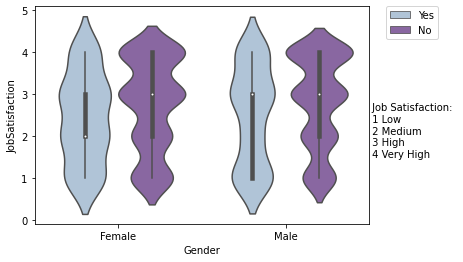

In [120]:
violin_plot("Gender","JobSatisfaction","Attrition" )
plt.annotate(" Job Satisfaction: \n 1 Low\n 2 Medium\n 3 High \n 4 Very High", 
             xy = (1.5, 1.5), xytext = (1.5, 1.5))

Both male and female employees that stayed had higher levels of job satisfaction. Male employees that left had mostly low or high job satisfaction, while most females who left had medium or high job satisfaction.

<a id='g-environment-satisfaction'></a>
### Environment Satisfaction

Text(1.5, 1.5, ' Environment Satisfaction: \n 1 Low\n 2 Medium\n 3 High \n 4 Very High')

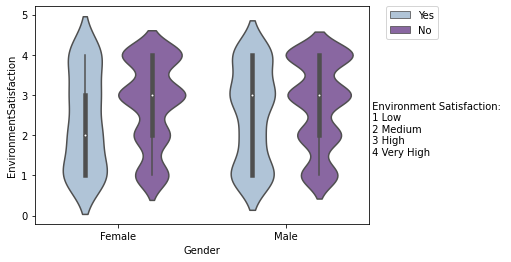

In [121]:
violin_plot("Gender", "EnvironmentSatisfaction", "Attrition")
plt.annotate(" Environment Satisfaction: \n 1 Low\n 2 Medium\n 3 High \n 4 Very High", 
             xy = (1.5, 1.5), xytext = (1.5, 1.5))

We see that males who left their job had either low or high / very high environment satisfaction levels, while more females who left had low or medium environment satisfaction.

<a id='g-relationship-satisfaction'></a>
### Relationship Satisfaction

Text(1.5, 1.5, ' Relationship Satisfaction: \n 1 Low\n 2 Medium\n 3 High \n 4 Very High')

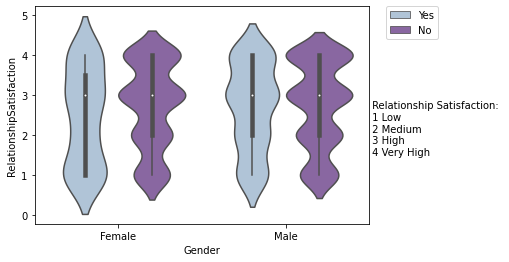

In [122]:
violin_plot("Gender","RelationshipSatisfaction","Attrition")
plt.annotate(" Relationship Satisfaction: \n 1 Low\n 2 Medium\n 3 High \n 4 Very High", 
             xy = (1.5, 1.5), xytext = (1.5, 1.5))

We see that most of male employees who left the company had higher relationship satisfaction, while a lot of females who left their job had lower relationship satisfaction and some had higher relationship satisfaction.

<a id='g-salary-hike'></a>
### Percent Salary Hike

In [123]:
get_counts(['PercentSalaryHike','Gender','Attrition'])

0        16
1        11
2        10
3        75
4        93
       ... 
1465     46
1466     54
1467     23
1468    107
1469     93
Name: Count_PercentSalaryHike_by_GenderAttrition, Length: 1470, dtype: int64

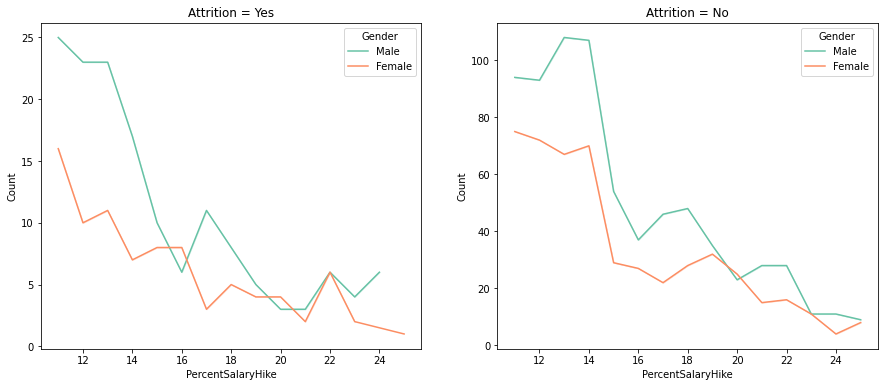

In [124]:
create_plots('PercentSalaryHike', 'Count_PercentSalaryHike_by_GenderAttrition', hue = 'Gender', plot_type = 'line')

We see that males and females have similar trends for both those who left and stayed in the company. Out of those who left higher number of people had lower percent salary hike. 

<a id='g-marital-status'></a>
### Marital Status

In [125]:
get_counts(['MaritalStatus','Gender','Attrition'])

0        47
1       348
2        73
3       241
4       348
       ... 
1465    348
1466    348
1467    348
1468    348
1469    348
Name: Count_MaritalStatus_by_GenderAttrition, Length: 1470, dtype: int64

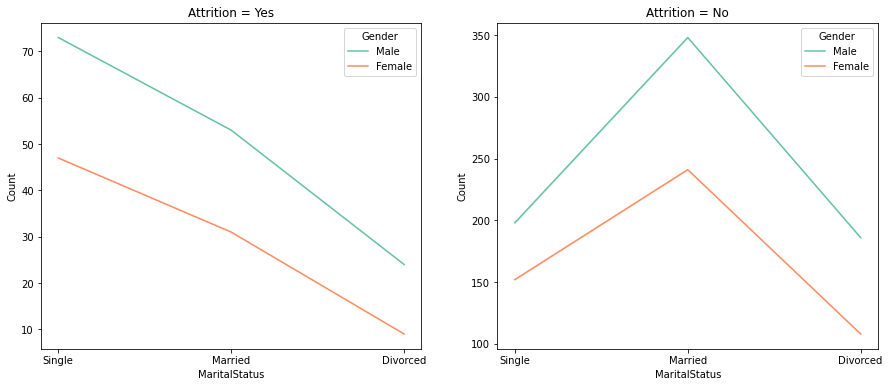

In [126]:
create_plots('MaritalStatus', 'Count_MaritalStatus_by_GenderAttrition', hue = 'Gender',plot_type = 'line')

From the graphs, single people are more likely to quit their job than married ones. Since the graphs are almost parallel, the trend is independent of gender. 

<a id='g-work-life-balance'></a>
### Work Life Balance

Text(1.5, 1.5, ' Work Life Balance: \n 1 Bad\n 2 Good\n 3 Better \n 4 Best')

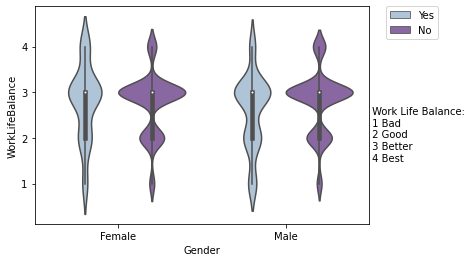

In [127]:
violin_plot("Gender","WorkLifeBalance", "Attrition")
plt.annotate(" Work Life Balance: \n 1 Bad\n 2 Good\n 3 Better \n 4 Best", 
             xy = (1.5, 1.5), xytext = (1.5, 1.5))

We see that most employees that left or stayed had 'better' work-life balance, both male and female.

<a id='g-years-at-company'></a>
### Years At Company

In [128]:
get_counts(['YearsAtCompany','Gender','Attrition'])

0        3
1       72
2       12
3       33
4       66
        ..
1465    97
1466    48
1467    41
1468    42
1469    61
Name: Count_YearsAtCompany_by_GenderAttrition, Length: 1470, dtype: int64

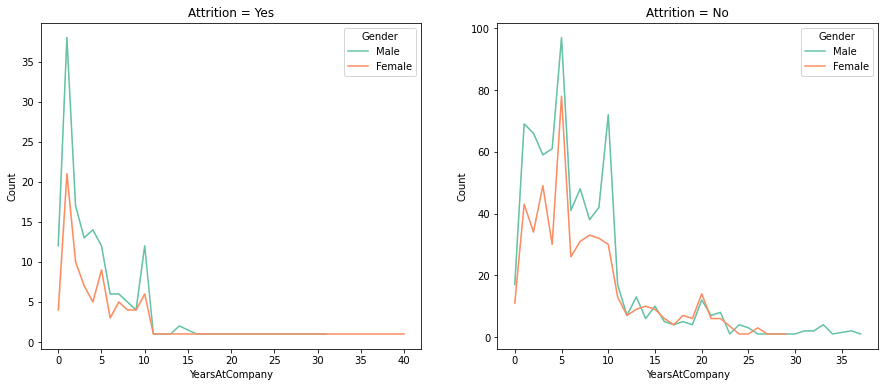

In [129]:
create_plots('YearsAtCompany', 'Count_YearsAtCompany_by_GenderAttrition', hue = 'Gender', plot_type = 'line')

The highest number of employees that quit their job was at 1st year of job, and higher numbers are between 1 and 5 years for both male and female employees. 

<a id='g-years-promotion'></a>
### Years Since Last Promotion

In [130]:
get_counts(['YearsSinceLastPromotion','Gender','Attrition'])

0        40
1       187
2        70
3        19
4        84
       ... 
1465    283
1466    187
1467    283
1468    283
1469    187
Name: Count_YearsSinceLastPromotion_by_GenderAttrition, Length: 1470, dtype: int64

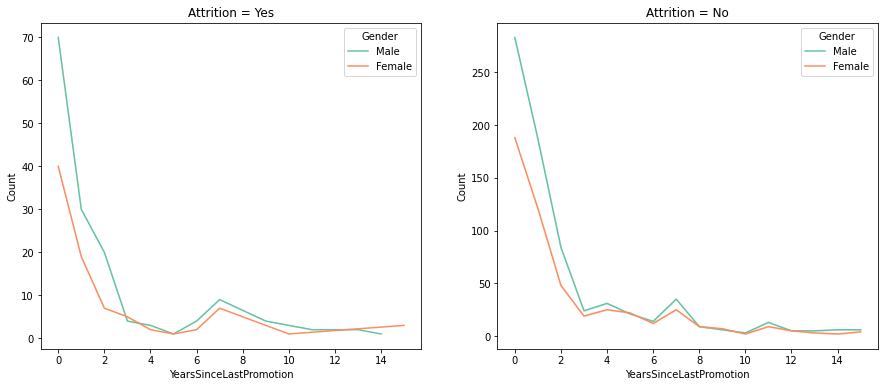

In [131]:
create_plots('YearsSinceLastPromotion', 'Count_YearsSinceLastPromotion_by_GenderAttrition', hue = 'Gender',plot_type = 'line')

Out of the employees that quit their jobs, most were within 2 years since last promotion. 

<a id='g-job-level'></a>
### Job Level

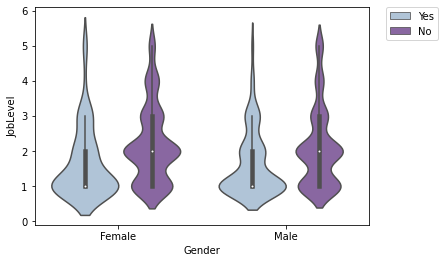

In [132]:
violin_plot("Gender", "JobLevel", "Attrition")

Both male and female employees who quit were more likely to quit at 1st job level. 

<a id='g-age'></a>
### Age

In [133]:
get_counts(['Age','Gender','Attrition'])

0        4
1       11
2        5
3       18
4       25
        ..
1465    35
1466    22
1467    25
1468    11
1469    39
Name: Count_Age_by_GenderAttrition, Length: 1470, dtype: int64

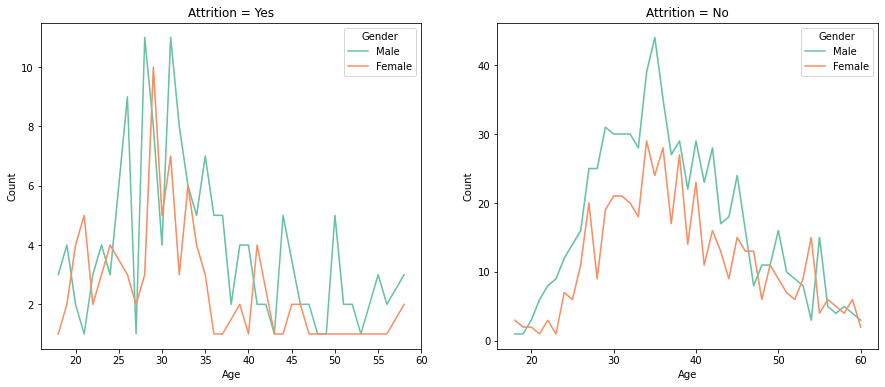

In [134]:
create_plots('Age', 'Count_Age_by_GenderAttrition', hue = 'Gender',plot_type = 'line')

The attrition is highest among 25 to 35 y.o. males and 27 to 35 y.o. females. Also, males aged 43 to 60 are more likely to quit their job than females. 

<a id='g-hourly-rate'></a>
### Hourly Rate 

In [135]:
get_counts(['HourlyRate','Gender','Attrition'])

0        3
1       13
2        2
3        8
4       10
        ..
1465    12
1466    16
1467    19
1468     6
1469     9
Name: Count_HourlyRate_by_GenderAttrition, Length: 1470, dtype: int64

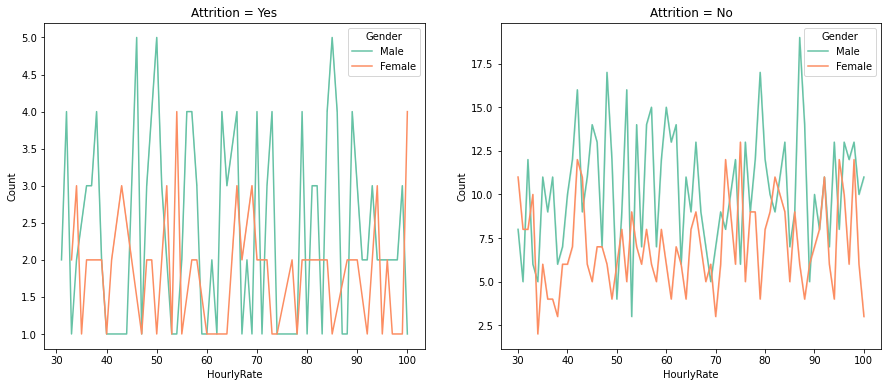

In [136]:
create_plots('HourlyRate', 'Count_HourlyRate_by_GenderAttrition', hue = 'Gender',plot_type = 'line')

We see from the plots that there isn't great discrepancy between hourly rate for males and females and attrition happens at different hourly rates, there isn't a clear trend. 

<a id='g-overtime'></a>
### Overtime

In [137]:
get_counts(['OverTime','Gender','Attrition'])

0        47
1       576
2        80
3       133
4       576
       ... 
1465    576
1466    576
1467    156
1468    576
1469    576
Name: Count_OverTime_by_GenderAttrition, Length: 1470, dtype: int64

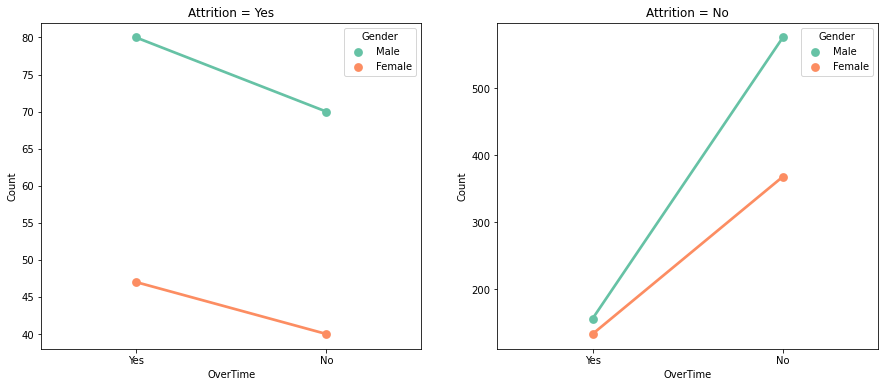

In [138]:
create_plots('OverTime', 'Count_OverTime_by_GenderAttrition', hue = 'Gender',plot_type = 'point')

We see that for those employees that left, overtime is independent of gender, and more employees that left did overtime, than those who stayed in the company. 

<a id='EDA2'></a>
## EDA 2: Education Field Differences

<a id='e-training-times'></a>
### Training Times Last Year

In [139]:
get_counts(['TrainingTimesLastYear','EducationField','Attrition'])

0         3
1       171
2         4
3       171
4       136
       ... 
1465    136
1466     42
1467     20
1468    136
1469    136
Name: Count_TrainingTimesLastYear_by_EducationFieldAttrition, Length: 1470, dtype: int64

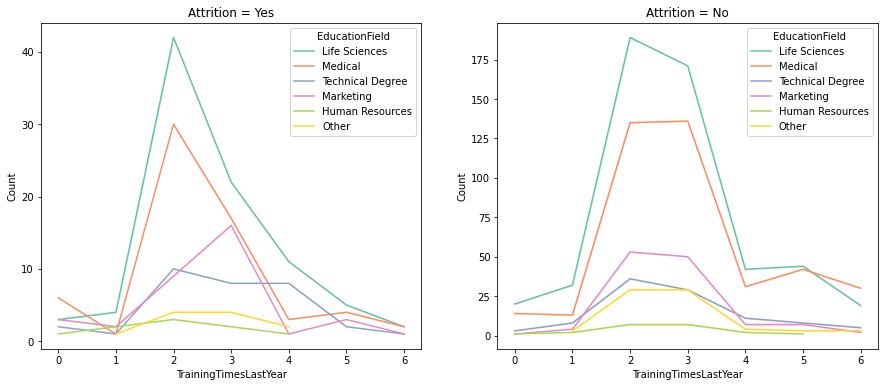

In [140]:
create_plots('TrainingTimesLastYear', 'Count_TrainingTimesLastYear_by_EducationFieldAttrition', 'EducationField',plot_type = 'line')

In Life Sciences, Technical Degree, HR and Medical Fields most of the employees who left had 2 trainings last year
In Marketing - 3 trainings

Most of those employees who stayed had 2-3 trainings last year regardless of department. 

<a id='e-years-at-company'></a>
### Years At Company

In [141]:
get_counts(['YearsAtCompany','EducationField','Attrition'])

0        4
1       47
2        2
3       27
4       31
        ..
1465    66
1466    23
1467    24
1468    23
1469    33
Name: Count_YearsAtCompany_by_EducationFieldAttrition, Length: 1470, dtype: int64

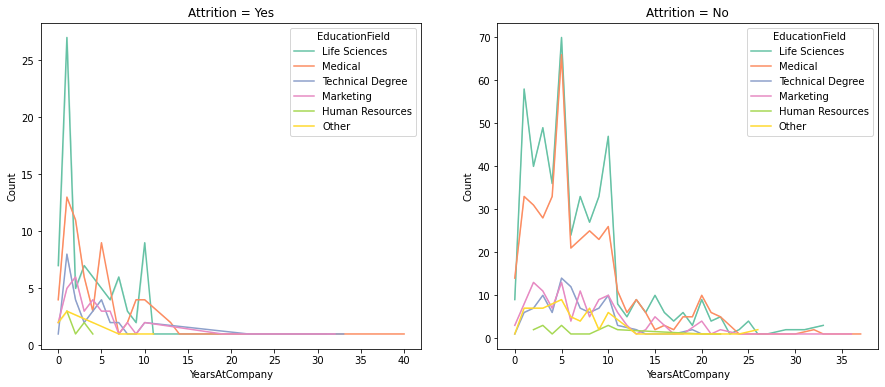

In [142]:
create_plots('YearsAtCompany', 'Count_YearsAtCompany_by_EducationFieldAttrition', 'EducationField',plot_type = 'line')

We see that out of employees that quit, those in HR quit after staying under 4 years in the company. 
Most employees of Life Sciences quit in the 1st year;
Medical fields quit in the first couple of years. 

<a id='e-years-current-role'></a>
### Years In Current Role

In [143]:
get_counts(['YearsInCurrentRole','EducationField','Attrition'])

0         6
1        73
2         5
3        73
4        94
       ... 
1465     94
1466     61
1467    117
1468      8
1469     42
Name: Count_YearsInCurrentRole_by_EducationFieldAttrition, Length: 1470, dtype: int64

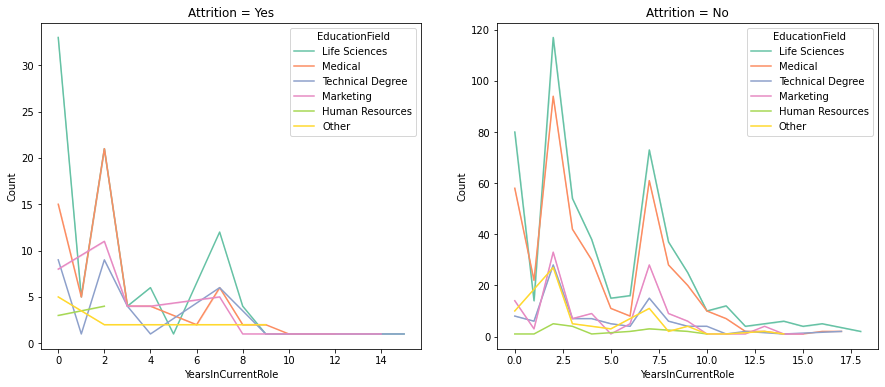

In [144]:
create_plots('YearsInCurrentRole', 'Count_YearsInCurrentRole_by_EducationFieldAttrition', 'EducationField',plot_type = 'line')

- For Life Sciences: most people quit less than 1 year into their job
- For Medical, Marketing and Technical Degree field: 2 years
- For HR: all the employees that quit did so within 2 years into their job

<a id='e-years-last-promotion'></a>
### Years Since Last Promotion

In [145]:
get_counts(['YearsSinceLastPromotion','EducationField','Attrition'])

0        43
1       131
2         7
3        15
4        42
       ... 
1465    148
1466    101
1467    205
1468    148
1469    101
Name: Count_YearsSinceLastPromotion_by_EducationFieldAttrition, Length: 1470, dtype: int64

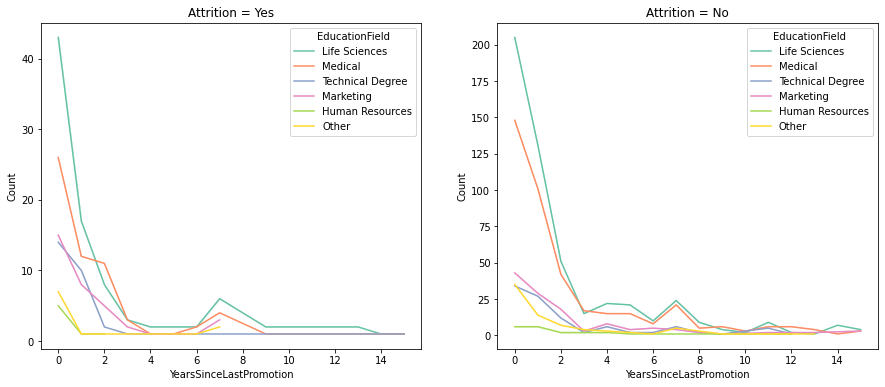

In [146]:
create_plots('YearsSinceLastPromotion', 'Count_YearsSinceLastPromotion_by_EducationFieldAttrition', 'EducationField',plot_type = 'line')

We see that the majority of employees left shortly after their last promotion.

<a id='e-years-current-manager'></a>
### Years With Current Manager

In [147]:
get_counts(['YearsWithCurrManager','EducationField','Attrition'])

0        2
1       73
2        5
3       82
4       95
        ..
1465    40
1466    58
1467    54
1468    33
1469    95
Name: Count_YearsWithCurrManager_by_EducationFieldAttrition, Length: 1470, dtype: int64

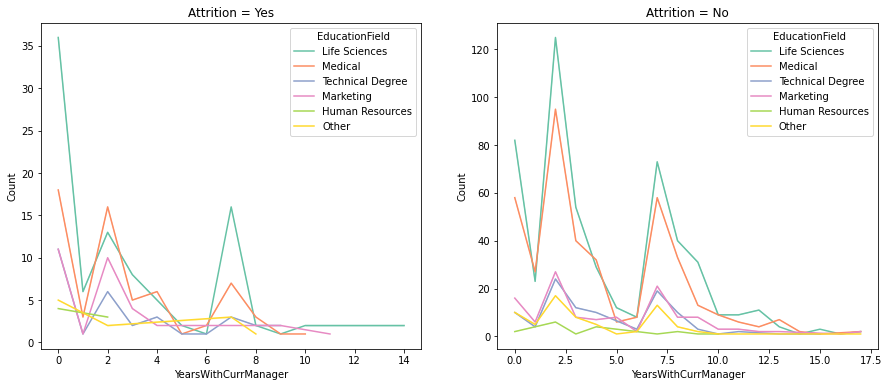

In [148]:
create_plots('YearsWithCurrManager', 'Count_YearsWithCurrManager_by_EducationFieldAttrition', 'EducationField',plot_type = 'line')

We see a similar trend among all Education Fields, employees left after either 2 or 7 years with current manager.

<a id='e-stock-option-level'></a>
### Stock Option Level

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'Life Sciences'),
  Text(1, 0, 'Other'),
  Text(2, 0, 'Medical'),
  Text(3, 0, 'Marketing'),
  Text(4, 0, 'Technical Degree'),
  Text(5, 0, 'Human Resources')])

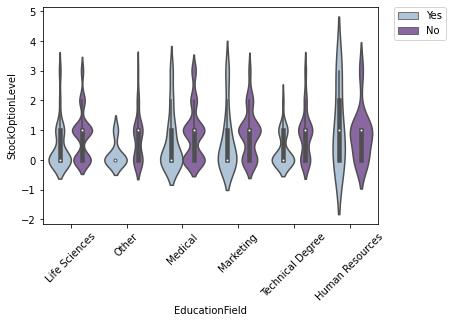

In [149]:
violin_plot('EducationField', 'StockOptionLevel', 'Attrition')
plt.xticks(rotation = 45)

More employees that left their job did so when there was no stock option, this trend is the same for all education fields.

<a id='EDA3'></a>
## EDA 3: Salary Differences

<a id='s-age'></a>
### Age 

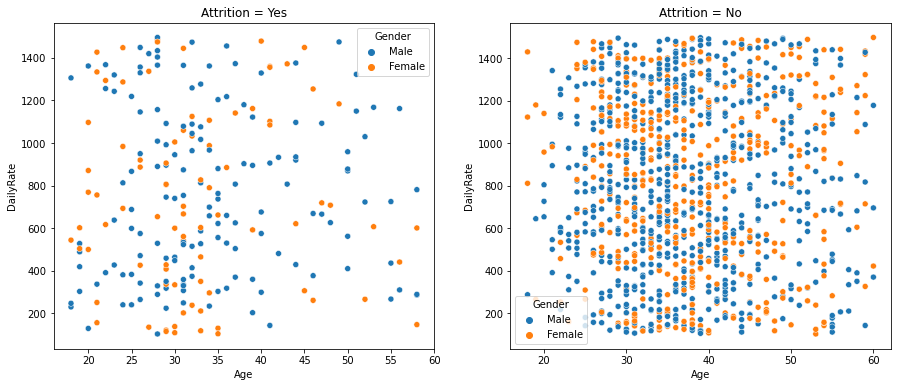

In [150]:
create_plots('Age', 'DailyRate', 'Gender', 'scatter')

We see that daily rate does not depend on gender or age

<a id='s-job-level'></a>
### Job Level 

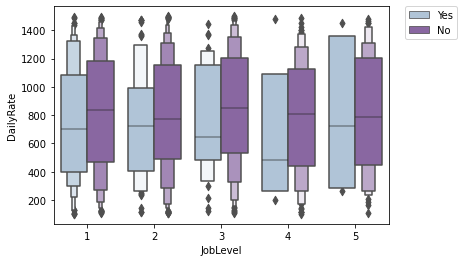

In [151]:
boxen_plot('JobLevel', 'DailyRate', 'Attrition')

Employees that quit their job did so having lower daily rate than those who stayed, except for the 5th job level.

<a id='s-job-satisfaction'></a>
### Job Satisfaction

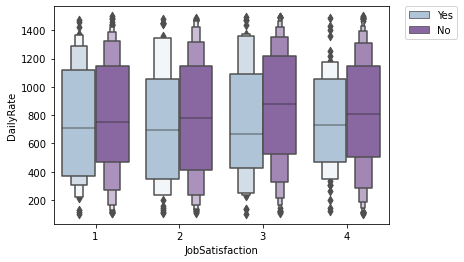

In [152]:
boxen_plot('JobSatisfaction', 'DailyRate', 'Attrition')

Employees that left their job had lower daily rate than those who stayed regardless of job satisfaction levels.

<a id='s-education'></a>
### Education

Text(5.1, 500, 'Education: \n 1 Below College\n 2 College\n 3 Bachelor \n 4 Master \n 5 Doctor')

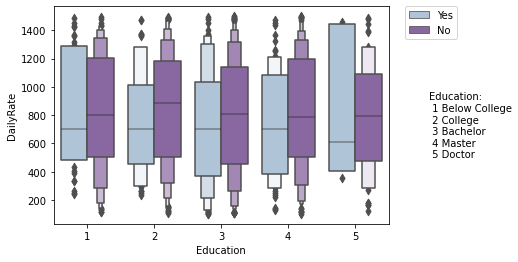

In [173]:
boxen_plot('Education', 'DailyRate', 'Attrition')
plt.text(5+0.1, 500, "Education: \n 1 Below College\n 2 College\n 3 Bachelor \n 4 Master \n 5 Doctor", 
         horizontalalignment='left', size='medium', color='black')

We see that employees that have education level below college or Doctorate degrees left the company while having the same  or higher salary than the employees that did not quit their job. Those with college, bachelor or master degrees left their job while having the same or lower salary than those who did not leave their job. 

<a id='s-overtime'></a>
### OverTime

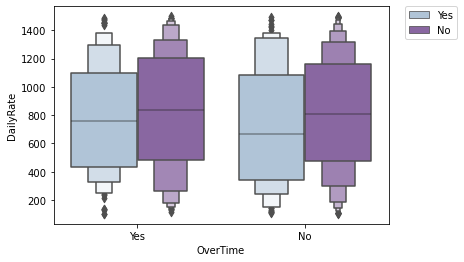

In [154]:
boxen_plot('OverTime', 'DailyRate', 'Attrition')

We see that those employees that left the company had lower daily rate than those who stayed regardless of whether they did overtime or not. 

<a id='s-companies-worked'></a>
### Number of Companies Worked

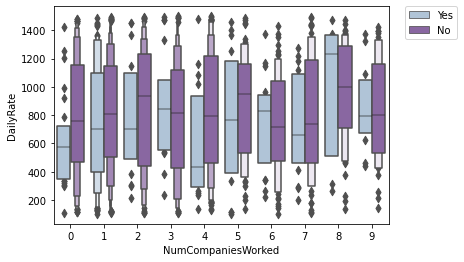

In [155]:
boxen_plot('NumCompaniesWorked', 'DailyRate', 'Attrition')

The employees who haven't worked in any other company before and left the company had salaries significantly lower than the median of those who stayed. A similar trend is seen for the employees who worked in 4 companies. In general, the employees who left had lower median salary than those who stayed except for those who worked in 8 companies. 

<a id='EDA4'></a>
## EDA 4: Job Level Differences

<a id='j-age'></a>
### Age

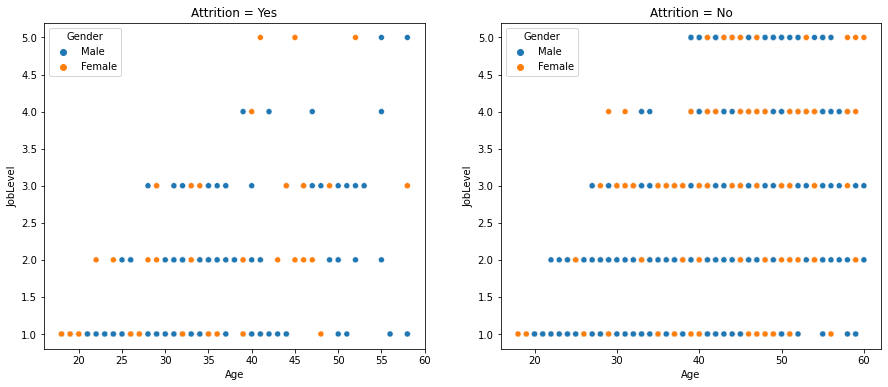

In [156]:
create_plots('Age', 'JobLevel', 'Gender', 'scatter')

We see that trends in job level age distributions are similar for both those employees who left the company and those who stayed. There are minimum age differences for different job levels, as job level increases, the minimum age for that job level also increases. 

<a id='j-job-role'></a>
### Job Role

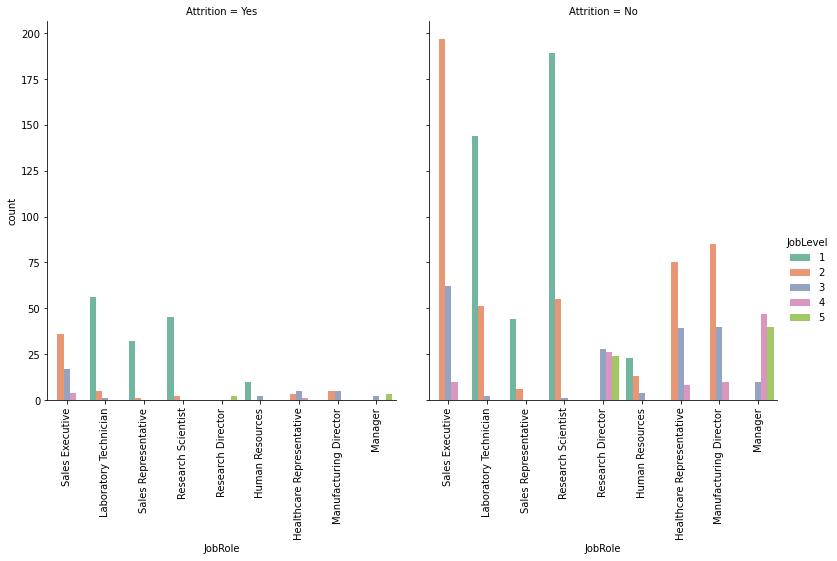

In [157]:
plot_cat_vars('JobRole','JobLevel', rotation = 'yes')

- We see that only Manager and Research director had job level 5, and had job levels 1 and 2 absent. Those research directors that quit their job had job level 5. 
- The number of sales representatives who quit is similar to the number of those who stay
- The majority of those who were in HR left at job level 1
- Healthcare Representatives and Manufacturing Directors who left their job did so at job level 2 and 3


<a id='j-job-satisfaction'></a>
### Job Satisfaction

Text(5.1, 1, 'Job Satisfaction: \n 1 Low\n 2 Medium\n 3 High \n 4 Very High')

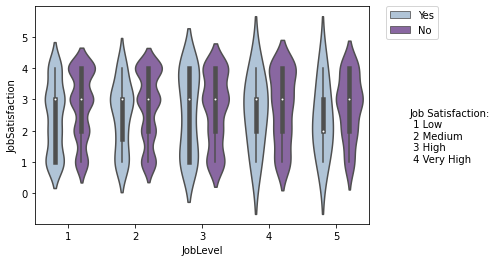

In [158]:
violin_plot('JobLevel','JobSatisfaction', 'Attrition')
plt.text(5+0.1, 1, "Job Satisfaction: \n 1 Low\n 2 Medium\n 3 High \n 4 Very High", 
         horizontalalignment='left', size='medium', color='black')

- At Job Levels 1 and 5: the employees who left had lower levels of satisfaction than those who stayed
- At Job Levels 2 and 4: most employees who left had high level of satisfaction, while those who stayed had high/very high levels of satisfaction
- At Job Level 3: employees that left has either low or very high levels of satisfaction, while those who stayed had mostly high/very high levels of job satisfaction

<a id='j-job-satisfaction-entry-level'></a>
### Job Satisfaction Entry Level

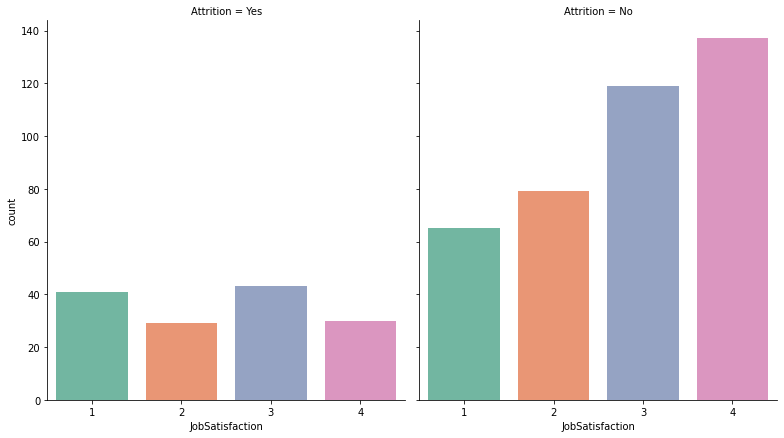

In [159]:
plot_cat_vars("JobSatisfaction",None, df = df[df["JobLevel"] == 1])

The employees at entry job level that stayed in the company had higher job satisfaction.

<a id='j-work-life-balance'></a>
### Work Life Balance

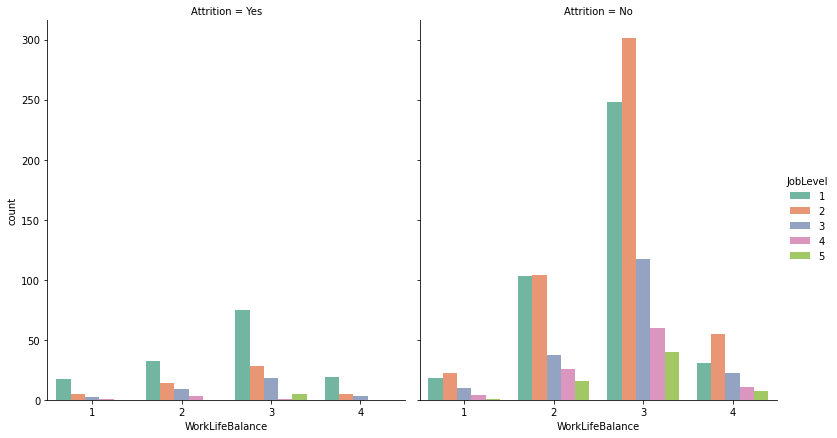

In [160]:
plot_cat_vars("WorkLifeBalance", "JobLevel")

Employees are more likely to quit at entry level jobs regardless of their level of work life balance.

<a id='j-environment-satisfaction'></a>
### Environment Satisfaction

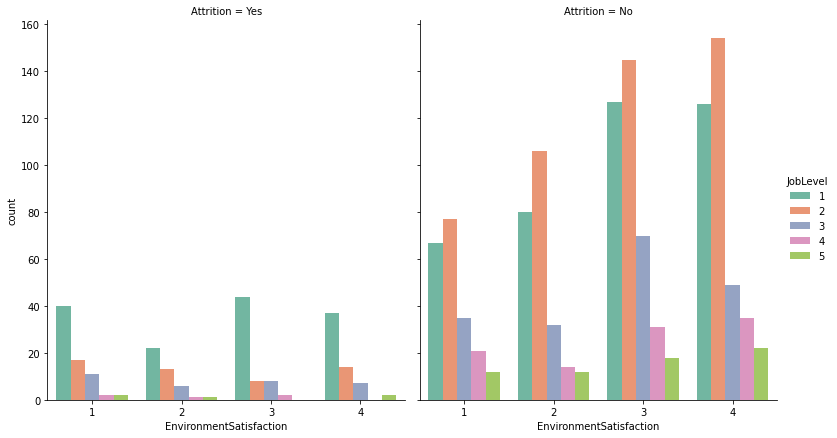

In [161]:
plot_cat_vars("EnvironmentSatisfaction", "JobLevel")

Employees are more likely to quit at entry level jobs regardless of  their level of environment satisfaction.

In [164]:
df["years_atcompany_group"] = pd.cut(x=df['YearsAtCompany'], bins=[0,5,10,20,30,40], labels=["under 5","5-10","10-20","20-30","30-40"])

numerical_vars = ['YearsAtCompany','YearsInCurrentRole','YearsSinceLastPromotion','YearsWithCurrManager',
                  'TotalWorkingYears','MonthlyIncome']

<a id='j-years-at-company'></a>
### Years At The Company

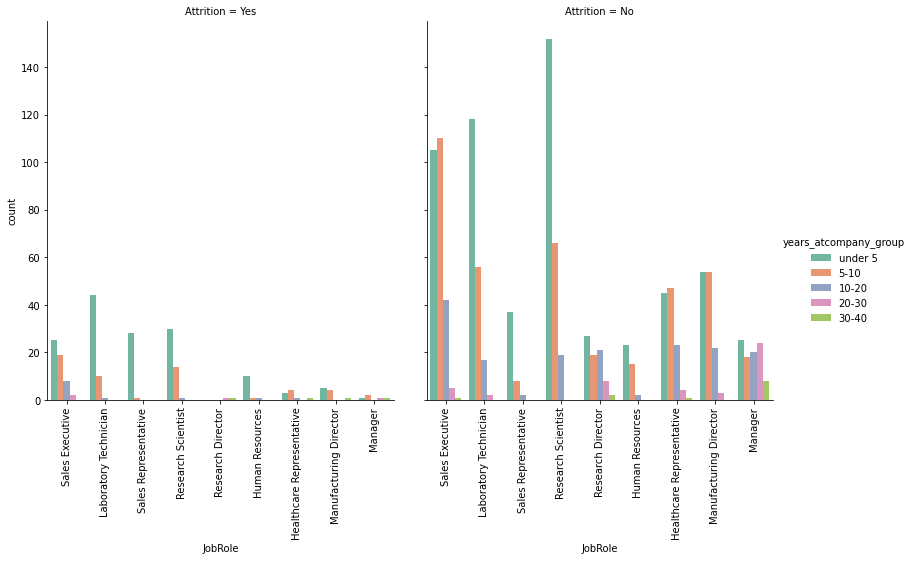

In [167]:
plot_cat_vars("JobRole","years_atcompany_group", df =df, rotation = 'yes')

We see that employee attrition is more likely to happen at early stages of career as indicated by green peaks on the graph on the left. Now let's explore the group under 5 years in more details.

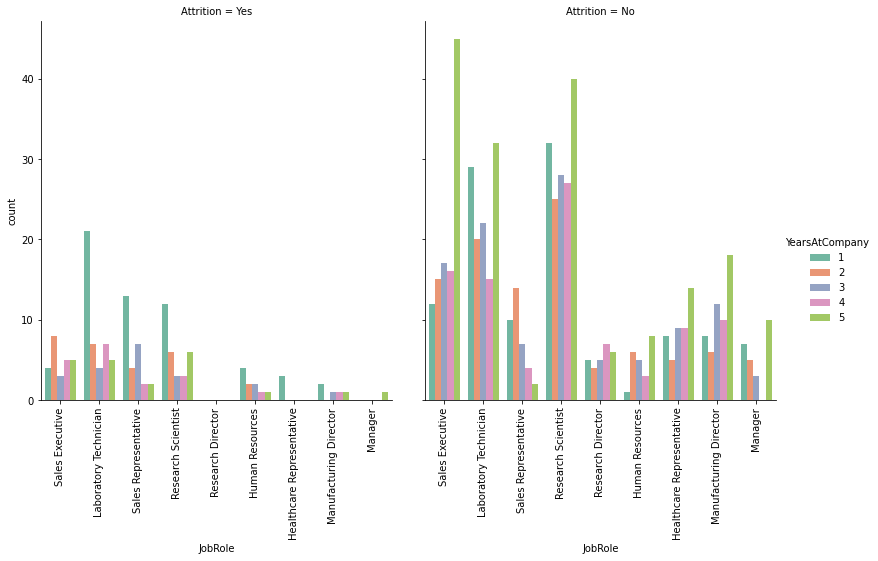

In [168]:
plot_cat_vars("JobRole","YearsAtCompany", df =df[df["years_atcompany_group"] == 'under 5'], rotation = 'yes')

The employees who were in the company only for a year are more likely to quit than those who spent more than 3 years in the company.

Sales Executives, Laboratory Technicians, Research Scientists and Manufacturing Directors were more likely to stay in the company if they worked there for 5 years.

<a id='worklifebalance-overtime'></a>
### Work Life Balance and Overtime

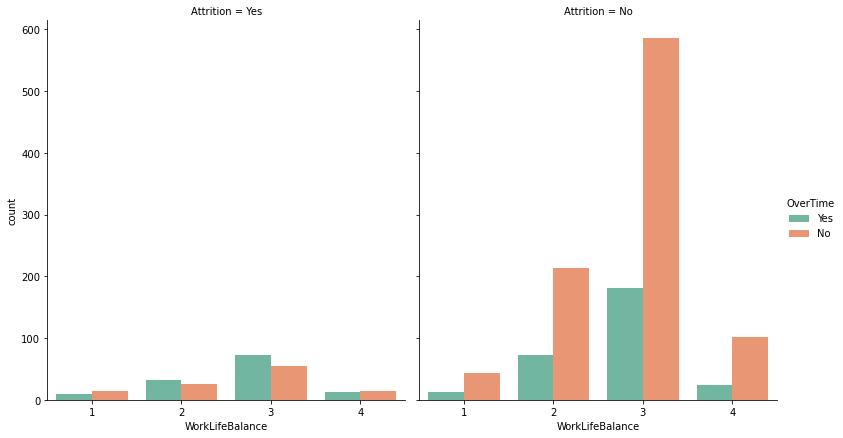

In [169]:
plot_cat_vars("WorkLifeBalance","OverTime")

- Those who do more overtime are more likely to quit even if they have good work life balance.
- People who have good work-life balance do a lot less overtime. 
- Among those who didn't quit their job, the majority did not do overtime regardless of work-life balance.

<a id='correlation-plots'></a>
### Correlation plots

Text(0.5, 1.0, 'Attrition = No')

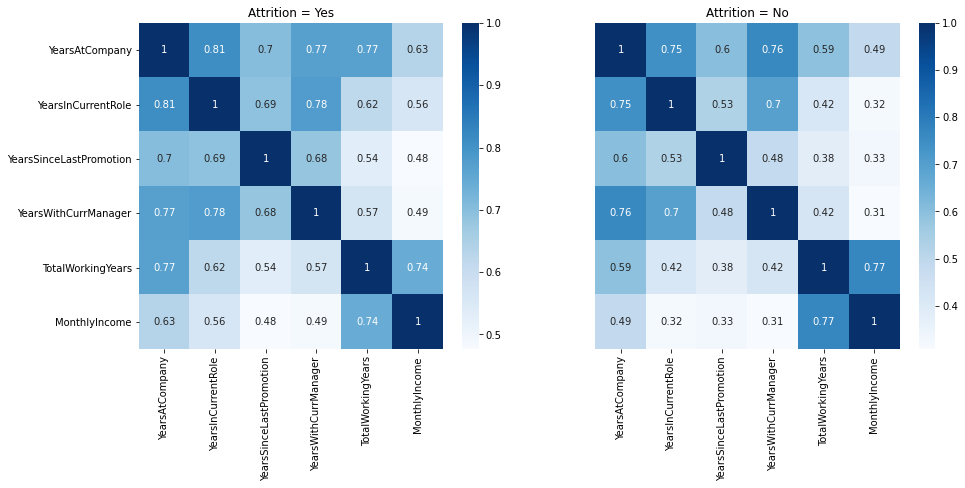

In [170]:
fig, ax = plt.subplots(1,2, figsize = (15,6))
sns.heatmap(df[df["Attrition"] == "Yes"][numerical_vars].corr(), cmap='Blues', annot=True, ax=ax[0])
sns.heatmap(df[df["Attrition"] == "No"][numerical_vars].corr(), cmap='Blues', annot=True, ax=ax[1], yticklabels = False)
ax[0].set_title("Attrition = Yes")
ax[1].set_title("Attrition = No")

Comparing the correlations for employees who left the company and those who stayed we see that:
- Monthly income has higher correlations with all variables but Total Working Years for employees that left, than for those who stayed
- Years at Company has higher correlation with total working years for those who quit their job
- Years at Company and Years with Current manager have almost the same correlation for both those who quit their job and those that did not
- Years since Last Promotion has higher correlation with all the variables for those who quit than for those who did not

<a id='summary'></a>
# Summary

### Gender Trends:

- Females are more likely to leave if they have low/medium environment and relationship satisfaction, while men left both having high and low levels of satisfaction
- The attrition is highest among 25 to 35 y.o. males and 27 to 35 y.o. females. Also, males aged 43 to 60 are more likely to quit their job than females

For both male and female employees:

- Out of those who left higher number of people had lower percent salary hike and most were within 2 years since last promotion
- Employees that stayed had higher levels of job satisfaction
- Single people are more likely to quit their job than married ones
- The highest number of employees that quit their job was at 1st year of job, and higher numbers are between 1 and 5 years for both male and female employees
- There isn't great discrepancy between hourly rate for males and females and attrition happens at different hourly rates
- More employees that left did overtime, than those who stayed in the company

### Education Field Differences

- In Life Sciences, Technical Degree, HR and Medical Fields most of the employees who left had 2 trainings last year In Marketing - 3 trainings, but most of those employees who stayed had 2-3 trainings last year regardless of department.

- For Life Sciences: most people quit less than 1 year into their job
- For Medical, Marketing and Technical Degree field: 2 years
- For HR: all the employees that quit did so within 2 years into their job

For all departments:

- The majority of employees left shortly after their last promotion
- Employees left after either 2 or 7 years with current manager
- More employees that left their job did so when there was no stock option

### Salary Differences

- Employees that quit their job did so having lower daily rate than those who stayed for all job levels (except 5th) regardless of job satisfaction level or overtime
- We see that employees that have education level below college or Doctorate degrees left the company while having the same or higher salary than the employees that did not quit their job. Those with college, bachelor or master degrees left their job while having the same or lower salary than those who did not leave their job.
- The employees who haven't worked in any other company before and left the company had salaries significantly lower than the median of those who stayed. A similar trend is seen for the employees who worked in 4 companies. In general, the employees who left had lower median salary than those who stayed except for those who worked in 8 companies.

### Job Level Differences

- We see that only Manager and Research director had job level 5, and had job levels 1 and 2 absent. Those research directors that quit their job had job level 5.
- The number of sales representatives who quit is similar to the number of those who stay
- The majority of those who were in HR left at job level 1
- Healthcare Representatives and Manufacturing Directors who left their job did so at job level 2 and 3

- At Job Levels 1 and 5: the employees who left had lower levels of satisfaction than those who stayed
- At Job Levels 2 and 4: most employees who left had high level of satisfaction, while those who stayed had high/very high levels of satisfaction
- At Job Level 3: employees that left has either low or very high levels of satisfaction, while those who stayed had mostly high/very high levels of job satisfaction

- The employees at entry job level that stayed in the company had higher job satisfaction
- Employees are more likely to quit at entry level jobs regardless of their level of work life balance or levels of environment satisfaction
- The employees who were in the company only for a year are more likely to quit than those who spent more than 3 years in the company
- Sales Executives, Laboratory Technicians, Research Scientists and Manufacturing Directors were more likely to stay in the company if they worked there for 5 years

- Those who do more overtime are more likely to quit even if they have good work life balance.
- People who have good work-life balance do a lot less overtime.
- Among those who didn't quit their job, the majority did not do overtime regardless of work-life balance.


<a id='limitations-and-discussion'></a>
# Limitations and Discussion

In [171]:
ef_percent = df["EducationField"].value_counts() / 1470
ef_percent

Life Sciences       0.412245
Medical             0.315646
Marketing           0.108163
Technical Degree    0.089796
Other               0.055782
Human Resources     0.018367
Name: EducationField, dtype: float64

In [172]:
dep_percent = df["Department"].value_counts() / 1470
dep_percent

Research & Development    0.653741
Sales                     0.303401
Human Resources           0.042857
Name: Department, dtype: float64

After examining the data, we see that 31.6 % and 41.2 % are medical and life sciences education field respectively, which make up the majority (72.8 %) of our employees. Also highest percentage of employees (65.4%) is in research and development. Thus more data is needed to be able to accurately predict employee attrition in different industries and education fields. 

There are internal and external causes of attrition, but the scope of this analysis is limited to internal causes only (based on available data). 